# Algebraic Epidemiology
#### A demonstration of tool capabilities provided by the GT/UF ASKE team

This notebook will demonstrate several key capabilities which the AlgebraicPetri library can provide access to. These demonstrated capabilities are made possible by the ASKE-funded integration of Petri net models with the community-developed open source Julia libraries [AlgebraicJulia](https://www.algebraicjulia.org/) and [SciML](https://sciml.ai/).

This notebook showcases the following capabilities:
1. Model visualization and simulation from the GroMET common format
1. Graphical model editing through integration with [Semagrams.jl](https://algebraicjulia.github.io/Semagrams.jl/dev)
1. Model structural decomposition
1. Model transformations
    1. Model geographic stratification
    1. Model rewriting
1. Model sensitivity analysis through integration with [ForwardDiff.jl](https://juliadiff.org/ForwardDiff.jl/stable/)

In [1]:
# Necessary imports 
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Semagrams, Semagrams.Examples
using Catlab
using Catlab.CategoricalAlgebra
using DifferentialEquations
using Plots

include("../src/GrometInterop.jl")
include("../src/ModelStratify.jl")
using .GrometInterop
using .ModelStratify

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3986720424721231358\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12325192016595430713\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3986720424721231358\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Model Visualization and Simulation

We begin by importing, visualizing and simulating a simple SIR model. Since the model already contains the concentration and rate information, we only have to define the time range over which the model will be simulated.

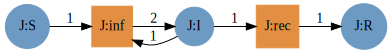

In [2]:
(SIR = gromet2petrinet("SimpleSIR_PNC.json")) |> Graph

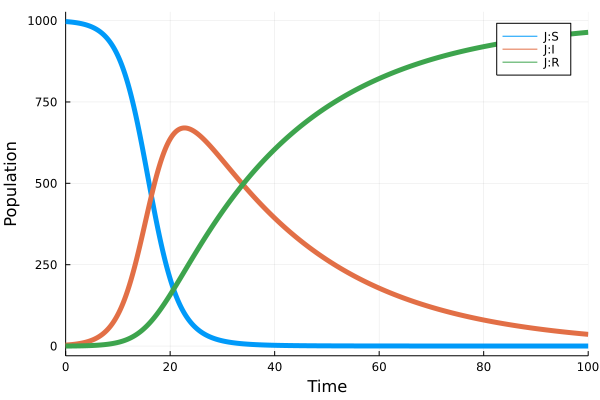

In [3]:
prob = ODEProblem(vectorfield(SIR), concentrations(SIR), (0.0,100.0), rates(SIR))
sol = solve(prob)
plot(sol, linewidth=5, xaxis="Time", yaxis="Population")

## Graphical Model editing

Thanks to the generality of the data structures provided by [Catlab.jl](https://algebraicjulia.github.io/Catlab.jl/stable/), we are able to easily generate an interactive epidemiological model editing tool with [Semagrams.jl](https://algebraicjulia.github.io/Semagrams.jl/dev)

In [4]:
@semagramschema LabelledReactionNetSema(TheoryLabelledReactionNet) begin
  @box S Circle :sname
  @box T Square :tname
  @wire I(is,it)
  @wire O(ot,os)
  @data Name Stringlike
  @data Rate Numeric
  @data Concentration Numeric
end;

In [5]:
p = Semagram{LabelledReactionNet{Float64, Float64}}(LabelledReactionNetSema)

Semagram{Catlab.CSetDataStructures.AttributedCSet{Catlab.Theories.CatDesc{(:T, :S, :I, :O), (:it, :is, :ot, :os), (3, 3, 4, 4), (1, 2, 1, 2)}, Catlab.Theories.AttrDesc{Catlab.Theories.CatDesc{(:T, :S, :I, :O), (:it, :is, :ot, :os), (3, 3, 4, 4), (1, 2, 1, 2)}, (:Rate, :Concentration, :Name), (:rate, :concentration, :tname, :sname), (1, 2, 1, 2), (1, 2, 3, 3)}, Tuple{Float64, Float64, Symbol}, (:is, :it, :os, :ot), (), Tables, Indices} where {Tables<:NamedTuple, Indices<:NamedTuple}}(WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}()), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("sending" => (Observable{Dict{String, Any}} with 2 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :rate), (Stringlike, :tname)], "<polygon points=\"-40,-40 40,-40 40,40 -40,40\"></polygon>", :tname), :S => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :concentration), (Stringlike, :sname)], "<circle r=\"40\"></circle>", :sname)), "wire_types" => Dict{Symbol, WireProperties}(:I => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :S), :is, ("Box", :T), :it, "DefaultWire"), :O => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :T), :ot, ("Box", :S), :os, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing), "receiving" => (Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :rate), (Stringlike, :tname)], "<polygon points=\"-40,-40 40,-40 40,40 -40,40\"></polygon>", :tname), :S => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :concentration), (Stringlike, :sname)], "<circle r=\"40\"></circle>", :sname)), "wire_types" => Dict{Symbol, WireProperties}(:I => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :S), :is, ("Box", :T), :it, "DefaultWire"), :O => WireProperties(Tuple{AttributeType, Symbol}[], ("Box", :T), :ot, ("Box", :S), :os, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "semagrams", "/Users/user/.julia/packages/Semagrams/71R02/src/../deps/bundles/app.bundle.js")], Dict{Any, Any}("sending" => Any[WebIO.JSString("(function (newls){console.log(this); return this.state.resetWith(newls)})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000148a3b860, Task (runnable) @0x0000000148a3b860), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("(function (){var semagrams=System.registry.get(System.resolveSync(\"semagrams\")); var scopeobj=this; return setTimeout((function (){return semagrams.main(WebIO.getval({\"name\":\"receiving\",\"scope\":\"16836331226868168275\",\"id\":\"17058195718668956624\",\"type\":\"observable\"}),scopeobj,(function (x){return WebIO.setval({\"name\":\"receiving\",\"scope\":\"16836331226868168275\",\"id\":\"17058195718668956624\",\"type\":\"observable\"},x)}))}),20)})")]), Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:T => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :rat

In [6]:
load(p, "SVIIR.sema");

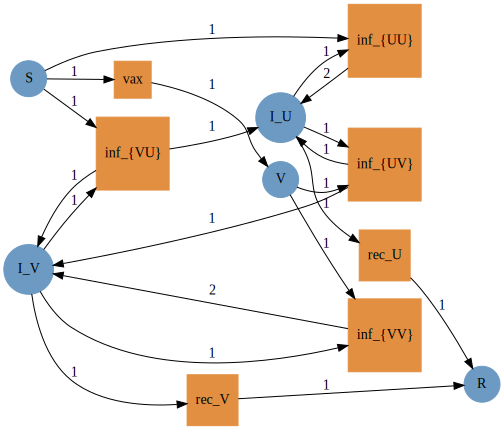

In [8]:
(model = get_acset(p)) |> Graph

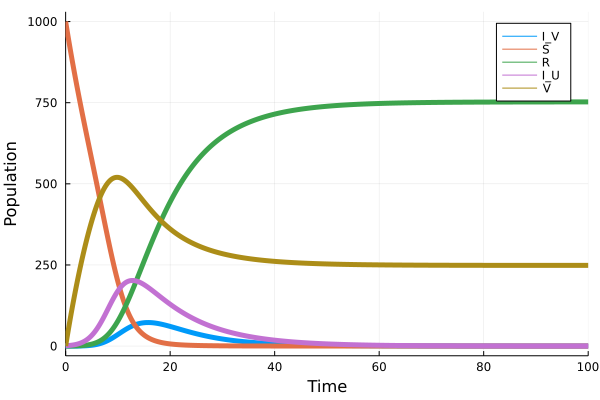

In [9]:
prob = ODEProblem(vectorfield(model), concentrations(model), (0.0,100.0), rates(model))
sol = solve(prob)
plot(sol, linewidth=5, xaxis="Time", yaxis="Population")

## Model Structural Decomposition

Our use of the ACSet data structure from [Catlab.jl](https://algebraicjulia.github.io/Catlab.jl/stable/) allows us to interact with the tooling around the [_subobject algebra_](https://algebraicjulia.github.io/Catlab.jl/stable/generated/graphs/subgraphs/) of Petri nets. This allows us to find how smaller, well-understood epidemiological models are embedded into larger, more complex models. This also provides all of the expected operators from propositional logic in addition to some extra (~, ¬, ∧, ∨), which prove to be very useful in decomposing a larger model into smaller sub-models.

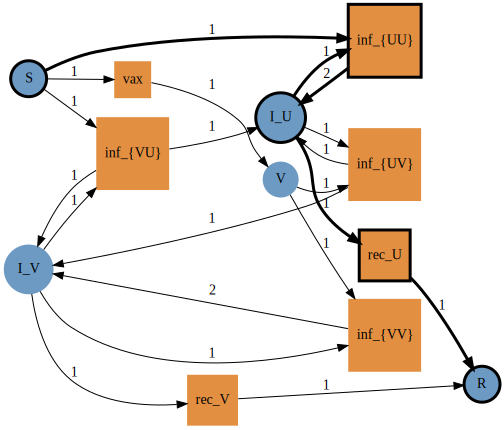

In [10]:
# Visualization of an embedding (of which there are 2) of SIR onto the Chime+ model

s = Subobject.(compare(SIR, model).legs)
Graph(s[1])

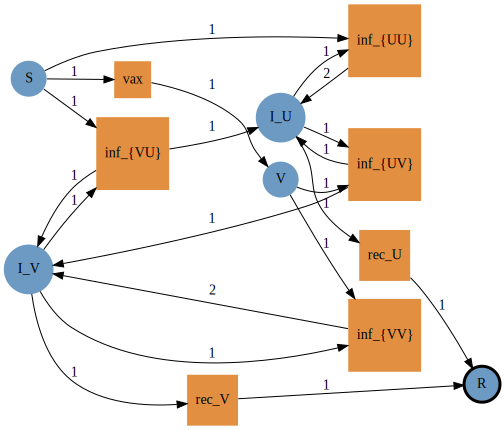

In [11]:
# The intersection of the two SIR embeddings into the Chime+ model
Graph(s[1] ∧ s[2])

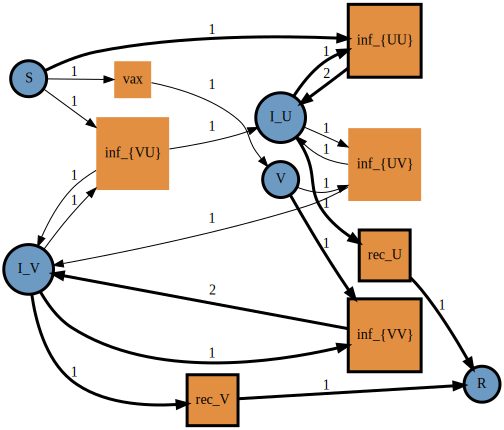

In [12]:
# The submodel which only contains transitions and states that are valid embeddings of SIR
# This shows the portion of the Chime+ model which is just a double epidemic model
Graph(s[1] ∨ s[2])

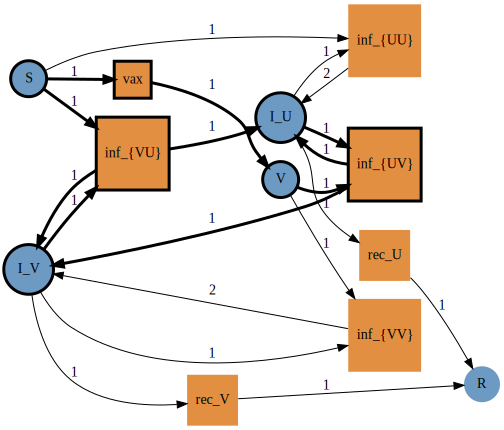

In [13]:
# This statement provides the interaction terms between the two embeddings of SIR
# This sub-model is the interaction between the two embedded SIR models, which make Chime+ distinct from a double-epidemic model
Graph(~(s[1] ∨ s[2]))

## Model Transformations

In [14]:
@semagramschema ScaleGraphSchema(ModelStratify.TheoryScaleGraph) begin
  @box V Circle :conc_scale
  @wire E(src,tgt)
  @data Scale Numeric
end;

In [15]:
geo_graph = Semagram{ModelStratify.ScaleGraph{Float64}}(ScaleGraphSchema)

Semagram{Catlab.CSetDataStructures.AttributedCSet{Catlab.Theories.CatDesc{(:V, :E), (:src, :tgt), (2, 2), (1, 1)}, Catlab.Theories.AttrDesc{Catlab.Theories.CatDesc{(:V, :E), (:src, :tgt), (2, 2), (1, 1)}, (:Scale,), (:edge_scale, :conc_scale, :rate_scale), (2, 1, 1), (1, 1, 1)}, Tuple{Float64}, (:src, :tgt), (), Tables, Indices} where {Tables<:NamedTuple, Indices<:NamedTuple}}(WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}()), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("sending" => (Observable{Dict{String, Any}} with 2 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale)], "<circle r=\"40\"></circle>", :conc_scale)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing), "receiving" => (Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale)], "<circle r=\"40\"></circle>", :conc_scale)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "semagrams", "/Users/user/.julia/packages/Semagrams/71R02/src/../deps/bundles/app.bundle.js")], Dict{Any, Any}("sending" => Any[WebIO.JSString("(function (newls){console.log(this); return this.state.resetWith(newls)})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000015906adc0, Task (runnable) @0x000000015906adc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("(function (){var semagrams=System.registry.get(System.resolveSync(\"semagrams\")); var scopeobj=this; return setTimeout((function (){return semagrams.main(WebIO.getval({\"name\":\"receiving\",\"scope\":\"14080340917079127509\",\"id\":\"11566338198612309431\",\"type\":\"observable\"}),scopeobj,(function (x){return WebIO.setval({\"name\":\"receiving\",\"scope\":\"14080340917079127509\",\"id\":\"11566338198612309431\",\"type\":\"observable\"},x)}))}),20)})")]), Observable{Dict{String, Any}} with 0 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[], "schema" => Dict{String, Dict{Symbol, V} where V}("box_types" => Dict{Symbol, BoxProperties}(:V => BoxProperties(Tuple{AttributeType, Symbol}[(Numeric, :conc_scale), (Numeric, :rate_scale)], "<circle r=\"40\"></circle>", :conc_scale)), "wire_types" => Dict{Symbol, WireProperties}(:E => WireProperties(Tuple{AttributeType, Symbol}[(Numeric, :edge_scale)], ("Box", :V), :src, ("Box", :V), :tgt, "DefaultWire")), "port_types" => Dict{Symbol, PortProperties}()), "wires" => Tuple{Int64, Dict{_A, _B} where {_A, _B}}[]), "boxlocs" => Tuple{Int64, Tuple{Float64, Float64}}[]), Observable{Dict{String, Any}} with 2 listeners. Value:
Dict{String, Any}("sg" => Dict{String, Any}("gen" => Dict("i" => 0), "boxes" => Tuple{Int64, Dict{_A, _B} where {

In [22]:
load(geo_graph, "city.sema");

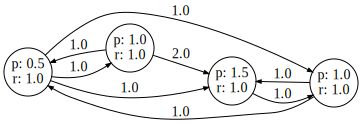

In [16]:
(cities = get_acset(geo_graph)) |> ModelStratify.show_graph

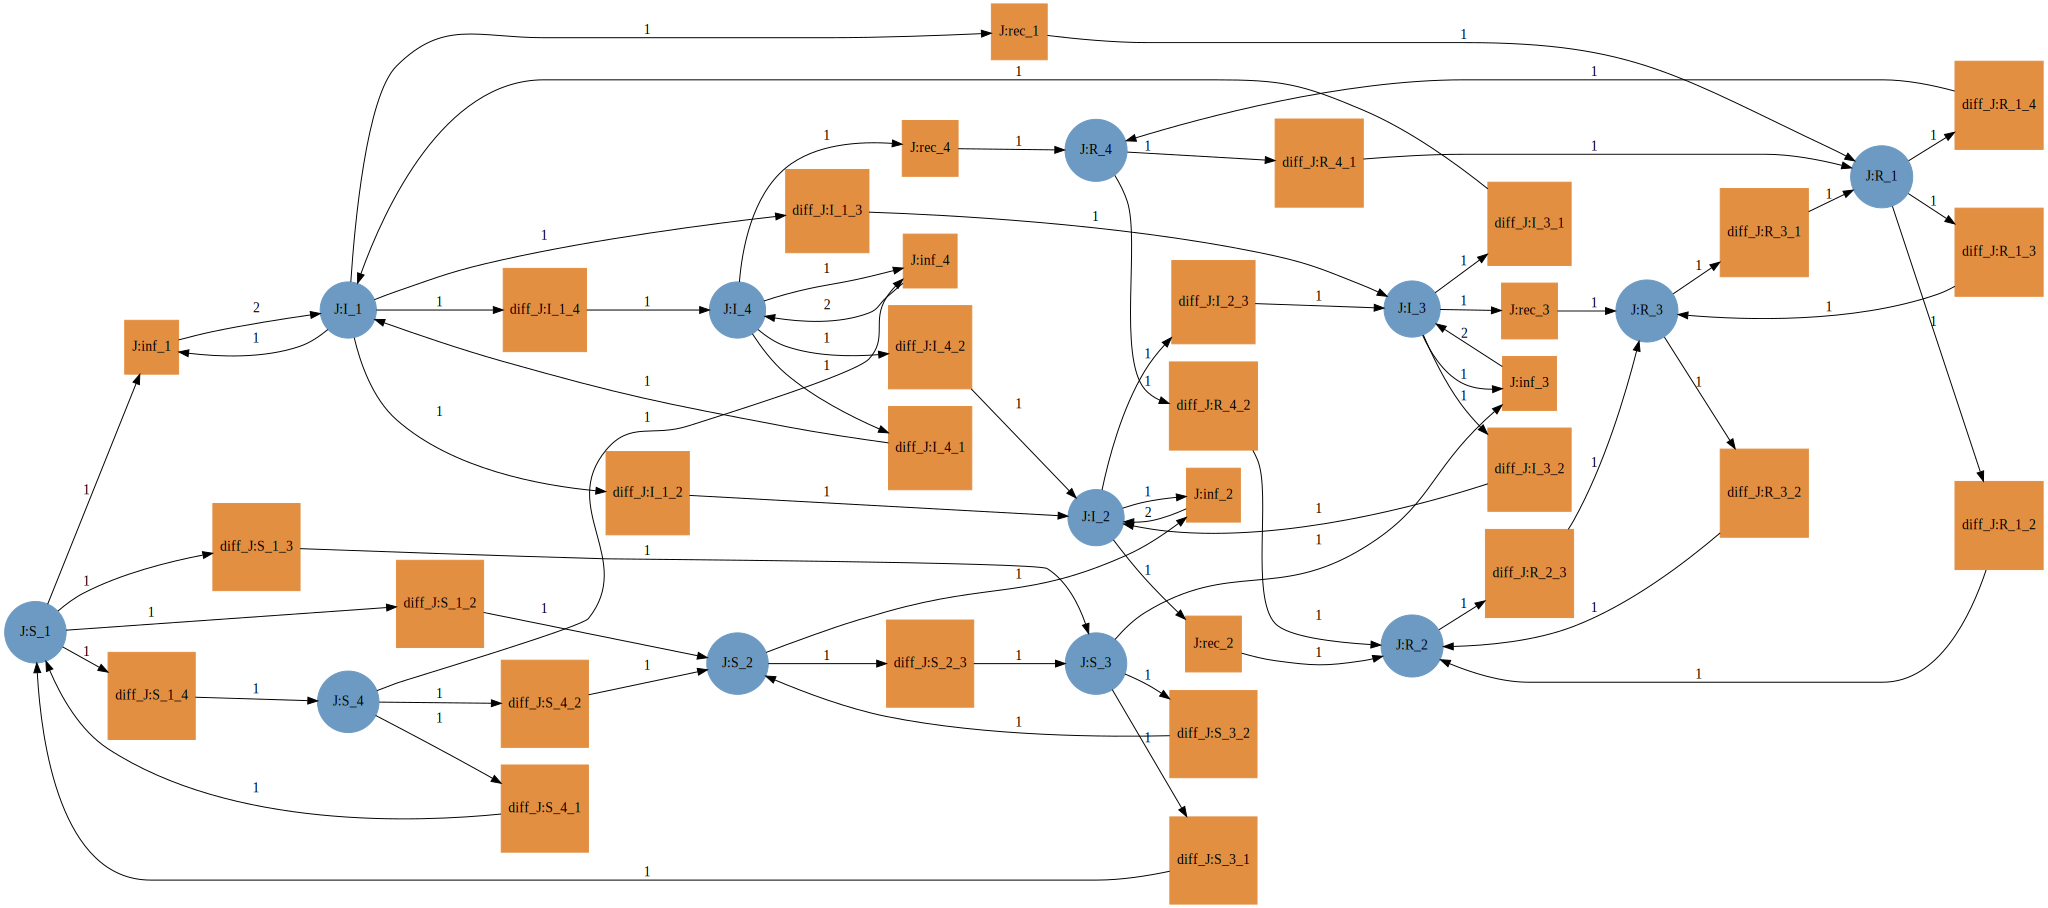

In [17]:
(SIR3 = ModelStratify.diff_strat(SIR, cities, [Symbol("J:S")=>1e-3, 
                                               Symbol("J:I")=>1e-4,
                                               Symbol("J:R")=>2e-3])) |> Graph

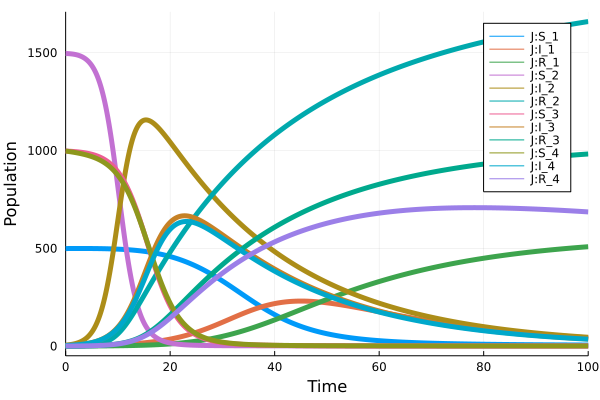

In [18]:
prob = ODEProblem(vectorfield(SIR3), concentrations(SIR3), (0.0,100.0), rates(SIR3))
sol = solve(prob)
plot(sol, linewidth=5, xaxis="Time", yaxis="Population")

## Model Rewriting

## Model Sensitivity Analysis